In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization,Flatten
from tensorflow.keras.layers import MaxPooling1D,Conv1D,GlobalMaxPooling1D
from tensorflow.keras.optimizers import Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets,metrics

In [2]:
cancer_data=pd.read_csv("C:/Users/rashm/Desktop/cancer_prediction/data.csv")
cancer_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
cancer_data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [4]:

cancer_data["diagnosis"].unique()

array(['M', 'B'], dtype=object)

In [5]:

x=cancer_data.drop(["Unnamed: 32","id","diagnosis"],axis=1)

In [6]:
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
cancer_data["diagnosis"]=label.fit_transform(cancer_data["diagnosis"])

In [8]:
y=cancer_data["diagnosis"]

In [9]:
x.shape

(569, 30)

In [10]:
y.shape

(569,)

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0,stratify=y)

In [12]:
x_train.shape

(455, 30)

In [13]:
x_test.shape

(114, 30)

In [14]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [15]:
x_train=x_train.reshape(455,30,1)
x_test=x_test.reshape(114,30,1)

In [16]:
epochs=60

model=Sequential()

model.add(Conv1D(filters=32,kernel_size=2,activation='relu',input_shape=(30,1)))
model.add(BatchNormalization())
#model.add(MaxPooling1D())
model.add(Dropout(0.5))



model.add(Conv1D(filters=64,kernel_size=3,activation='relu'))
model.add(BatchNormalization())
#model.add(MaxPooling1D())
model.add(Dropout(0.5))


model.add(Conv1D(filters=128,kernel_size=3,activation='relu'))
model.add(BatchNormalization())
#model.add(MaxPooling1D())
model.add(Dropout(0.5))


model.add(Flatten())

model.add(Dense(64,activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))



In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 29, 32)            96        
_________________________________________________________________
batch_normalization (BatchNo (None, 29, 32)            128       
_________________________________________________________________
dropout (Dropout)            (None, 29, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 27, 64)            6208      
_________________________________________________________________
batch_normalization_1 (Batch (None, 27, 64)            256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 27, 64)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 25, 128)           2

In [18]:
model.compile(optimizer=Adam(0.00005),loss="binary_crossentropy",metrics=["accuracy"])


In [19]:
history = model.fit(x_train,y_train,epochs=epochs,validation_data=(x_test,y_test),verbose=1)


Train on 455 samples, validate on 114 samples
Epoch 1/60
455/455 [==============================] - 8s 16ms/sample - loss: 1.5288 - accuracy: 0.4505 - val_loss: 0.6816 - val_accuracy: 0.7281
Epoch 2/60
455/455 [==============================] - 1s 1ms/sample - loss: 1.3009 - accuracy: 0.5187 - val_loss: 0.6567 - val_accuracy: 0.7368
Epoch 3/60
455/455 [==============================] - 0s 811us/sample - loss: 0.9972 - accuracy: 0.5692 - val_loss: 0.6282 - val_accuracy: 0.6754
Epoch 4/60
455/455 [==============================] - 0s 834us/sample - loss: 1.0539 - accuracy: 0.6198 - val_loss: 0.6030 - val_accuracy: 0.6754
Epoch 5/60
455/455 [==============================] - 0s 802us/sample - loss: 0.9281 - accuracy: 0.6308 - val_loss: 0.5764 - val_accuracy: 0.6754
Epoch 6/60
455/455 [==============================] - 0s 807us/sample - loss: 0.8435 - accuracy: 0.6462 - val_loss: 0.5502 - val_accuracy: 0.6667
Epoch 7/60
455/455 [==============================] - 0s 844us/sample - loss: 0.7

455/455 [==============================] - 0s 798us/sample - loss: 0.1410 - accuracy: 0.9407 - val_loss: 0.1305 - val_accuracy: 0.9561
Epoch 57/60
455/455 [==============================] - 0s 829us/sample - loss: 0.1368 - accuracy: 0.9451 - val_loss: 0.1302 - val_accuracy: 0.9561
Epoch 58/60
455/455 [==============================] - 0s 836us/sample - loss: 0.1188 - accuracy: 0.9560 - val_loss: 0.1317 - val_accuracy: 0.9386
Epoch 59/60
455/455 [==============================] - 0s 825us/sample - loss: 0.1286 - accuracy: 0.9319 - val_loss: 0.1328 - val_accuracy: 0.9386
Epoch 60/60
455/455 [==============================] - 0s 839us/sample - loss: 0.1556 - accuracy: 0.9473 - val_loss: 0.1306 - val_accuracy: 0.9474


In [20]:
y_train=np.asarray(y_train) #converting labels to arrays 
y_test=np.asarray(y_test)

In [21]:
model.fit(x_train,y_train,epochs=epochs,validation_data=(x_test,y_test),verbose=1)


Train on 455 samples, validate on 114 samples
Epoch 1/60
455/455 [==============================] - 0s 862us/sample - loss: 0.1510 - accuracy: 0.9516 - val_loss: 0.1297 - val_accuracy: 0.9474
Epoch 2/60
455/455 [==============================] - 0s 897us/sample - loss: 0.1231 - accuracy: 0.9385 - val_loss: 0.1307 - val_accuracy: 0.9474
Epoch 3/60
455/455 [==============================] - 0s 939us/sample - loss: 0.2057 - accuracy: 0.9209 - val_loss: 0.1297 - val_accuracy: 0.9474
Epoch 4/60
455/455 [==============================] - 0s 777us/sample - loss: 0.2263 - accuracy: 0.9011 - val_loss: 0.1259 - val_accuracy: 0.9474
Epoch 5/60
455/455 [==============================] - 0s 795us/sample - loss: 0.1597 - accuracy: 0.9429 - val_loss: 0.1239 - val_accuracy: 0.9561
Epoch 6/60
455/455 [==============================] - 0s 844us/sample - loss: 0.1480 - accuracy: 0.9495 - val_loss: 0.1228 - val_accuracy: 0.9561
Epoch 7/60
455/455 [==============================] - 0s 820us/sample - loss: 

455/455 [==============================] - 0s 836us/sample - loss: 0.1119 - accuracy: 0.9538 - val_loss: 0.1136 - val_accuracy: 0.9561
Epoch 57/60
455/455 [==============================] - 0s 916us/sample - loss: 0.1291 - accuracy: 0.9604 - val_loss: 0.1126 - val_accuracy: 0.9561
Epoch 58/60
455/455 [==============================] - 0s 934us/sample - loss: 0.1246 - accuracy: 0.9582 - val_loss: 0.1125 - val_accuracy: 0.9649
Epoch 59/60
455/455 [==============================] - 0s 888us/sample - loss: 0.0771 - accuracy: 0.9604 - val_loss: 0.1103 - val_accuracy: 0.9561
Epoch 60/60
455/455 [==============================] - 0s 989us/sample - loss: 0.1383 - accuracy: 0.9516 - val_loss: 0.1089 - val_accuracy: 0.9561


In [33]:

y_pred=model.predict(x_test)
y_pred=(y_pred>0.5)


In [53]:
y_pred

array([[False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [

In [23]:

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_pred,y_test)

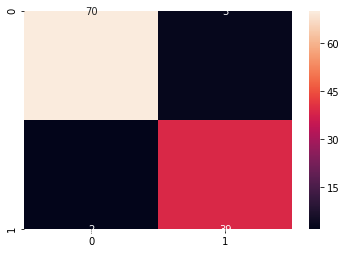

In [24]:

import seaborn as sns
sns.heatmap(cm,annot=True)

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)



0.956140350877193

In [26]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
print("Precision score {}%".format(round(precision_score(y_test, y_pred),3)))
print("Recall score {}%".format(round(recall_score(y_test, y_pred),3)))
print("F1 Score {}%".format(round(f1_score(y_test, y_pred, average='weighted'),3)))

Precision score 0.951%
Recall score 0.929%
F1 Score 0.956%


In [27]:
def plot_learningCurve(history,epoch):
    epoch_range = range(1, epoch+1)
    plt.plot(epoch_range, history.history['accuracy'])
    plt.plot(epoch_range, history.history['val_accuracy'])
    plt.title('Model_accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train, val'], loc='upper left')
    plt.show()
    
    epoch_range = range(1, epoch+1)
    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title('Model_loss')
    plt.ylabel('loss')
    plt.xlabel('Epoch')
    plt.legend(['train, val'], loc='upper left')
    plt.show()


In [28]:
history.history

{'loss': [1.5288481562347203,
  1.3008988149873504,
  0.9971842629568918,
  1.0538728310511662,
  0.9280788243471921,
  0.8434586265584925,
  0.7298388612139356,
  0.7181062004068396,
  0.6733555217365642,
  0.5644372255592556,
  0.6117304697796538,
  0.5137788966461853,
  0.5125764400749416,
  0.44465513098370896,
  0.42122427442489746,
  0.4112623112951661,
  0.4173025167250371,
  0.3450270026594728,
  0.47125041989179756,
  0.34168501830363013,
  0.30521052302895013,
  0.31962718125228046,
  0.3689314275243125,
  0.2584598788193294,
  0.26315936326653094,
  0.2637560013149466,
  0.29555936540876115,
  0.27099327983764504,
  0.23904527841688514,
  0.22476622763570847,
  0.25936025348338454,
  0.17167383605962272,
  0.19391543599725752,
  0.2484123218190539,
  0.2234661728962437,
  0.17861083513637493,
  0.16895090816440164,
  0.18629097742857514,
  0.17397554522114142,
  0.2555846261454153,
  0.22687378149111193,
  0.16043752634918296,
  0.17214764946109645,
  0.20142091128023362,
  

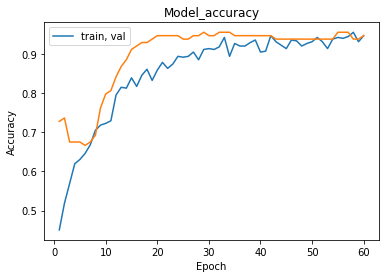

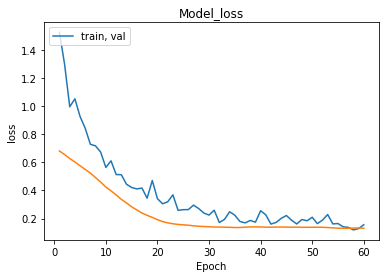

In [29]:
plot_learningCurve(history,epochs)